In [29]:
# Başlık: K-Means Kümeleme Projesi
# Veri Seti: dava.csv
# Amaç: Davaları benzer özelliklerine göre kümelemek ve Elbow yöntemi ile optimal küme sayısını belirlemek.

In [31]:
# Bu veri seti 50 farklı startup şirketinin çeşitli harcamalarını ve kârlılıklarını içeriyor:
# - R&D Spend: Ar-Ge harcaması
# - Administration: Yönetim harcaması
# - Marketing Spend: Pazarlama harcaması
# - State: Şirketin bulunduğu eyalet
# - Profit: Şirketin karı

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('50_Startups.csv')
data.head()
print("\n" + "="*50 + "\n")

1. GÖREV: R&D Harcaması ve Kâr Arasındaki İlişki (Scatter Plot)


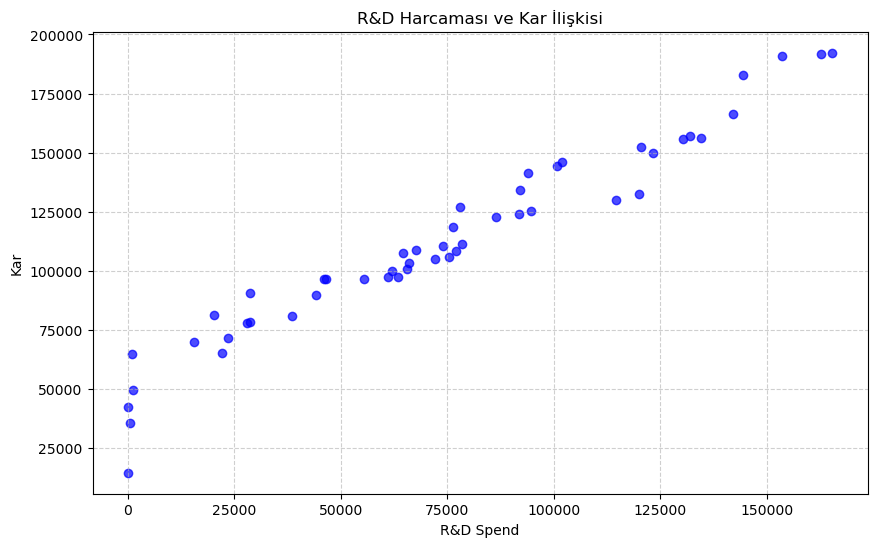

In [35]:
# 1.GÖREV : R&D Harcaması ve Kâr Arasındaki İlişki (Scatter Plot): Ar-Ge harcamaları ile kâr arasındaki ilişkiyi gösteren bir dağılım grafiği.
print("1. GÖREV: R&D Harcaması ve Kâr Arasındaki İlişki (Scatter Plot)")
plt.figure(figsize=(10, 6))
plt.scatter(data['R&D Spend'], data['Profit'], color='blue', alpha=0.7)
plt.title('R&D Harcaması ve Kar İlişkisi')
plt.xlabel('R&D Spend')
plt.ylabel('Kar')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n" + "="*50 + "\n")

In [37]:
#Grafik R&D harcaması arttıkça kârın da genelde yükseldiğini gösteriyor.

#Ar-Ge’ye yapılan yatırımın karlılığı güçlü biçimde desteklediğini düşündürüyor. Ama bazı şirketler düşük R&D harcamasıyla da ortalamanın üzerinde kar elde etmiş; yani sadece R&D tekil garati sunmuyor.

2.GÖREV: Yönetim Harcamaları ve Kâr Arasındaki İlişki (Scatter Plot):


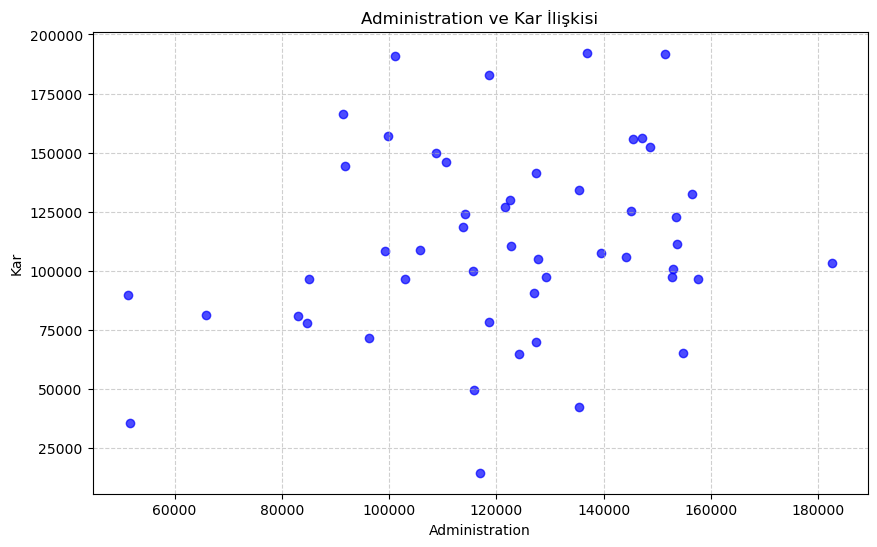

In [39]:
# 2.GÖREV: Yönetim Harcamaları ve Kâr Arasındaki İlişki (Scatter Plot): Yönetim harcamaları ile kâr arasındaki ilişkiyi gösteren bir dağılım grafiği.
print("2.GÖREV: Yönetim Harcamaları ve Kâr Arasındaki İlişki (Scatter Plot):")
plt.figure(figsize=(10, 6))
plt.scatter(data['Administration'], data['Profit'], color='blue', alpha=0.7)
plt.title('Administration ve Kar İlişkisi')
plt.xlabel('Administration')
plt.ylabel('Kar')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("\n" + "="*50 + "\n")


In [41]:
#Noktalar oldukça dağınık, belirgin bir artış eğilimi yok.

#Yönetim harcamalarının kar üzerinde doğrudan bir etkisi olmadığı söylenebilir.

3. GÖREV: Eyaletlere Göre Ortalama Kâr (Bar Chart):


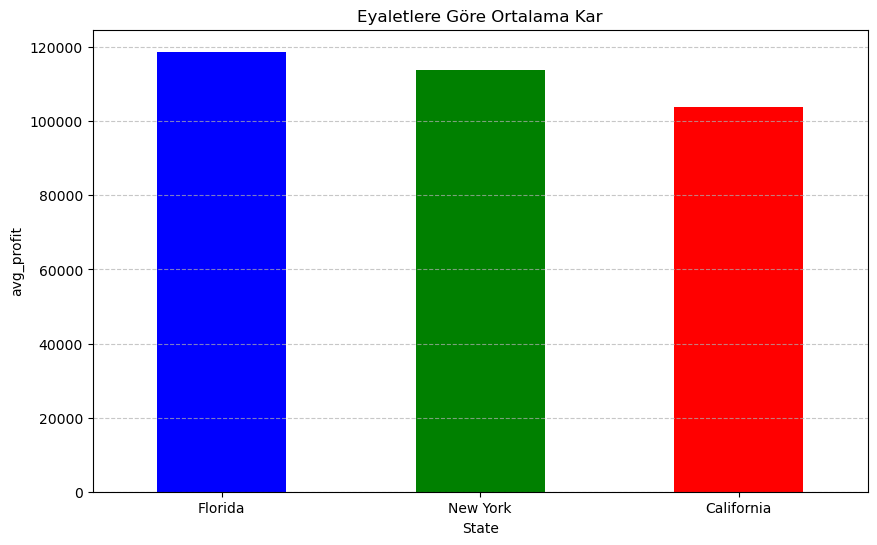

In [43]:
# 3. GÖREV: Eyaletlere Göre Ortalama Kâr (Bar Chart): Farklı eyaletlerdeki startup'ların ortalama kârlarını karşılaştıran bir çubuk grafik.
print("3. GÖREV: Eyaletlere Göre Ortalama Kâr (Bar Chart):")
avg_profit = data.groupby('State')['Profit'].mean().sort_values(ascending= False)

plt.figure(figsize=(10,6))
avg_profit.plot(kind= 'bar', color= ['blue', 'green', 'red'])
plt.title('Eyaletlere Göre Ortalama Kar')
plt.xlabel('State')
plt.ylabel('avg_profit')
plt.xticks(rotation= 0)
plt.grid(axis='y', linestyle= '--', alpha= 0.7)
plt.show()

print("\n" + "="*50 + "\n")


In [45]:
#Eyaletler arasında çok büyük farklar yok; bu da karlılığın eyaletten ziyade şirketin harcama stratejisine daha çok bağlı olduğunu düşündürüyor.

4. GÖREV: Harcama Türlerinin Karşılaştırması (Boxplot):


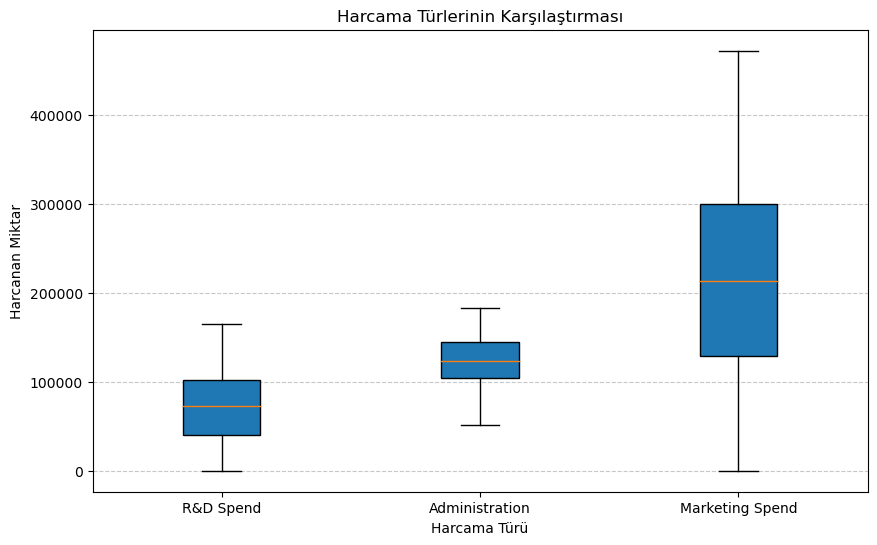

In [47]:
# 4. GÖREV: Harcama Türlerinin Karşılaştırması (Boxplot): R&D, yönetim ve pazarlama harcamalarının dağılımını karşılaştıran bir kutu grafiği.
print("4. GÖREV: Harcama Türlerinin Karşılaştırması (Boxplot):")
spending_data = data [['R&D Spend', 'Administration', 'Marketing Spend']]

plt.figure(figsize=(10,6))
plt.boxplot(spending_data.values, labels=spending_data.columns, patch_artist= True)
plt.title('Harcama Türlerinin Karşılaştırması')
plt.xlabel('Harcama Türü')
plt.ylabel('Harcanan Miktar')
plt.grid(axis='y', linestyle= '--', alpha= 0.7)
plt.show()

In [49]:
#Grafikte üç harcama türü arasında dağılım farklılıkları net olarak görünüyor.
#R&D Harcamaları, düşükten yükseğe geniş bir aralıkta yayılmış, medyanı diğer harcamalara nazaran düşük.
#Administration Harcamaları, daha dar bir aralıkta toplanmış ve dağılım daha dengeli.
#Marketing Harcamaları, en yüksek medyana sahip ve uç değerler barındırıyor.